###**Group members:**
1. Abdul Basit Raja
2. Pranav Kumar Sah
3. Pratik Nichite

#**Project on Text Summarization using transformer**

In [10]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


### installations

In [11]:
!pip install datasets
!pip install py7zr
!pip install accelerate
!pip install sentencepiece
!pip install rouge-score

### Trying different models from Hugging Face (BART, T5, PEGASUS)

In [12]:
from transformers import pipeline

In [13]:
input_text = '''BERT, which stands for Bidirectional Encoder Representations from Transformers, is a natural language processing (NLP) model developed by Google. It represents a significant advancement in the field of deep learning for language understanding. BERT is based on the Transformer architecture, which was introduced in a paper by Vaswani et al. in 2017.
The key innovation of BERT is its bidirectional training approach. Unlike previous language models that processed text in a left-to-right or right-to-left manner, BERT considers both the left and right context in all layers of the neural network. This bidirectional approach allows BERT to capture a more comprehensive understanding of the context and semantics of words in a sentence.
BERT has been pre-trained on large amounts of text data and can be fine-tuned for various NLP tasks, such as text classification, named entity recognition, and question answering. It has achieved state-of-the-art results on a wide range of benchmarks and has become a foundational model for many natural language processing applications.
'''

summaries = {}

In [14]:
model = pipeline('summarization', model="facebook/bart-large-cnn")
summaries["bart_output"] = model(input_text)[0]['summary_text']

model = pipeline('summarization', model="t5-base")
summaries["t5_output"] = model(input_text)[0]['summary_text']

model = pipeline('summarization', model="google/pegasus-cnn_dailymail")
summaries["pegasus_output"] = model(input_text)[0]['summary_text']

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/t5/tokenization_t5_fast.py:160: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-cnn_dailymail and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/88.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

In [15]:
print(f"Input Length: {len(input_text)}\nInput Text:\n{input_text}\n")
print(f"BART Output Length: {len(summaries['bart_output'])}\nBART Output: {summaries['bart_output']}\n")
print(f"T5 Output Length: {len(summaries['t5_output'])}\nT5 Output: {summaries['t5_output']}\n")
print(f"PEGASUS Output Length: {len(summaries['pegasus_output'])}\nPEGASUS Output: {summaries['pegasus_output']}\n")

Input Length: 1074
Input Text:
BERT, which stands for Bidirectional Encoder Representations from Transformers, is a natural language processing (NLP) model developed by Google. It represents a significant advancement in the field of deep learning for language understanding. BERT is based on the Transformer architecture, which was introduced in a paper by Vaswani et al. in 2017.
The key innovation of BERT is its bidirectional training approach. Unlike previous language models that processed text in a left-to-right or right-to-left manner, BERT considers both the left and right context in all layers of the neural network. This bidirectional approach allows BERT to capture a more comprehensive understanding of the context and semantics of words in a sentence.
BERT has been pre-trained on large amounts of text data and can be fine-tuned for various NLP tasks, such as text classification, named entity recognition, and question answering. It has achieved state-of-the-art results on a wide ra

### Comparing models

In [18]:
import matplotlib.pyplot as plt

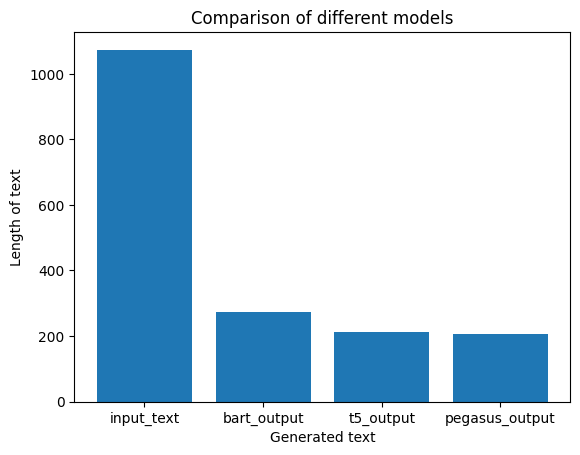

In [19]:
x_data = ["input_text"]
x_data.extend(list(summaries.keys()))

y_data = [len(input_text)]
y_data.extend(list(map(lambda x: len(x), summaries.values())))

plt.bar(x_data, y_data)
plt.ylabel("Length of text")
plt.xlabel("Generated text")
plt.title("Comparison of different models");

### Training Facebook BART model on SAMSum dataset from Hugging Face

In [37]:
from datasets import load_dataset
from transformers import pipeline

from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
import torch

In [9]:
device = 'gpu'
model_ckpt = 'facebook/bart-large-cnn'
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
model = AutoModelForSeq2SeqLM.from_pretrained(model_ckpt)

In [10]:
samsum = load_dataset('samsum')
samsum

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 14732
    })
    test: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 819
    })
    validation: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 818
    })
})

In [11]:
# lets build Data Collator

def get_feature(batch):
  encodings = tokenizer(batch['dialogue'], text_target=batch['summary'],
                        max_length=1024, truncation=True)

  encodings = {'input_ids': encodings['input_ids'],
               'attention_mask': encodings['attention_mask'],
               'labels': encodings['labels']}

  return encodings

In [12]:
samsum_pt = samsum.map(get_feature, batched=True)

Map:   0%|          | 0/14732 [00:00<?, ? examples/s]

Map:   0%|          | 0/819 [00:00<?, ? examples/s]

Map:   0%|          | 0/818 [00:00<?, ? examples/s]

In [13]:
columns = ['input_ids', 'labels', 'attention_mask']
samsum_pt.set_format(type='torch', columns=columns)

In [14]:
from transformers import DataCollatorForSeq2Seq
data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

In [15]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir = 'bart_dialogue',
    num_train_epochs=1,
    warmup_steps = 500,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    weight_decay = 0.01,
    logging_steps = 10,
    evaluation_strategy = 'steps',
    eval_steps=500,
    save_steps=1e6,
    gradient_accumulation_steps=16
)

trainer = Trainer(model=model, args=training_args, tokenizer=tokenizer, data_collator=data_collator,
                  train_dataset = samsum_pt['train'], eval_dataset = samsum_pt['validation'])

In [16]:
trainer.train()

You're using a BartTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss,Validation Loss


TrainOutput(global_step=230, training_loss=1.4831058502197265, metrics={'train_runtime': 1792.0504, 'train_samples_per_second': 8.221, 'train_steps_per_second': 0.128, 'total_flos': 8823772719611904.0, 'train_loss': 1.4831058502197265, 'epoch': 1.0})

### Exporting fine-tuned model

In [18]:
trainer.save_model('/content/drive/MyDrive/Semantics Project/bart_samsum_model')

### Importing fine-tuned model

In [20]:
model = pipeline('summarization', model="/content/drive/MyDrive/Semantics Project/bart_samsum_model")

### Comparing trained model with other pre-trained models (BART, T5, PEGASUS)

In [33]:
from rouge_score import rouge_scorer
import numpy as np
import pandas as pd

In [22]:
summaries["trained_model_output"] = trained_model(input_text)[0]['summary_text']
summaries["trained_model_output"]

'BERT is a natural language processing (NLP) model developed by Google. It is based on the Transformer architecture. It has been pre-trained on large amounts of text data and can be fine-tuned for various NLP tasks, such as text classification, named entity recognition, and question answering.'

In [23]:
scorer = rouge_scorer.RougeScorer(['rougeL'], use_stemmer=True)


model_scores = {}
for model_name, summary in summaries.items():
  model_scores[model_name] = scorer.score(input_text, summary)

rouge_scores = [score['rougeL'].fmeasure for score in model_scores.values()]

rouge_scores

[0.40930232558139534, 0.28, 0.26, 0.4292237442922375]

In [24]:
model_scores

{'bart_output': {'rougeL': Score(precision=1.0, recall=0.2573099415204678, fmeasure=0.40930232558139534)},
 't5_output': {'rougeL': Score(precision=0.9655172413793104, recall=0.16374269005847952, fmeasure=0.28)},
 'pegasus_output': {'rougeL': Score(precision=0.896551724137931, recall=0.15204678362573099, fmeasure=0.26)},
 'trained_model_output': {'rougeL': Score(precision=0.9791666666666666, recall=0.27485380116959063, fmeasure=0.4292237442922375)}}

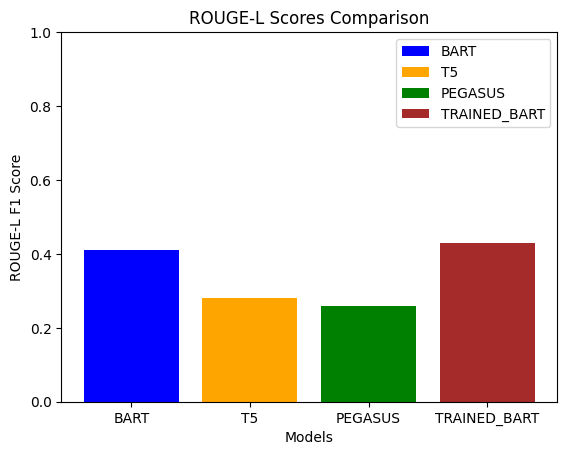

,Model,Rouge-F1 Score
0,BART,0.409302
1,T5,0.280000
2,PEGASUS,0.260000
3,TRAINED_BART,0.429224


In [34]:
models = ['BART', 'T5', 'PEGASUS', 'TRAINED_BART']
bars = plt.bar(models, rouge_scores, color=['blue', 'orange', 'green', 'brown'])

# Add a legend
plt.legend(bars, models)
plt.xlabel('Models')
plt.ylabel('ROUGE-L F1 Score')
plt.title('ROUGE-L Scores Comparison')
plt.ylim(0, 1)  # Set the y-axis range from 0 to 1
plt.show()

df = pd.DataFrame({"Model":models, "Rouge-F1 Score":rouge_scores})
df

- We can see that fine-tuned model has better score than other models

- We upload this same fine-tuned model to Hugging Face and use it through API interface in our frontend code.

#The End